In [160]:
%load_ext autoreload
%autoreload 2

import sys, os
import matplotlib
import itertools
from matplotlib import animation, rc

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

from IPython.display import HTML
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
import scipy.sparse as sps
import scipy.sparse.linalg as LAS

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [161]:
def srs(x, y, M):
    # x and y should be a meshgrid.
    u = np.zeros_like(x)
    
    u = (1/2)*(x**2 - 1)

    return u

                     

In [162]:
N = 20    # The number of interval
h = 0.1  # Lenght of each interval

# Set tolerance
tolerance = h**2 / 4.

# This means we have N+1 points -> N-1 interior points
w = np.zeros((N+3, N+2))

for i in range(0, N+3):
    w[i, -1] = 0
# x = 1, y at all points, u = 0

# Create temporary buffer
wn = np.copy(w)

# Iterator
k = 0

#while True:
for n in range(100):
    # Only iterate over the interior points.
    for i, j in itertools.product(range(1, N+2), range(1, N+1)):
        wn[i, j] = 0.25 * (wn[i-1, j] + w[i+1, j] + wn[i, j-1] + w[i, j+1] - (h**2)*1)
    #No-flux boundary at x = 0
    for i in(range(0, N+3)):
        w[i, 0] = w[i, 2]
    #No-flux boundary at y = 0
    for j in(range(0, N+2)):
        w[-1, j] = w[-3, j]
    #No-flux boundary at y = 1
    for j in(range(0, N+2)):
        w[0, j] = w[2, j]
    
    #BCs for corner points
    # at i = 0, j = 1
    w[1, 0] = w[1, 2]
    # at i = 1, j = 0
    w[-1, 1] = w[-3, 1]
    # at i = 0, j = -2
    w[-2, 0] = w[-2, 2]
    # at i = 1, j = -1
    w[-1, 1] = w[-3, 1]
    
    # Compute the difference between the old and new approximation
    error = np.max(np.abs(wn - w))
        
    # Replace the former approximation
    w[1:N+3, 1:N+2] = wn[1:N+3, 1:N+2]
       
    # Increment iteration counter
    k += 1
    
    # Print progress.
    # print('k = {0:d}, error = {1:.4g}'.format(k, error))
    
    if error < tolerance:
        break

print('Required {0:d} iterations!\nEror = {1:.4g}.'.format(k, error))

Required 100 iterations!
Eror = 0.1128.


<ipython-input-138-385d6538d0f7>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(xx, yy, w)


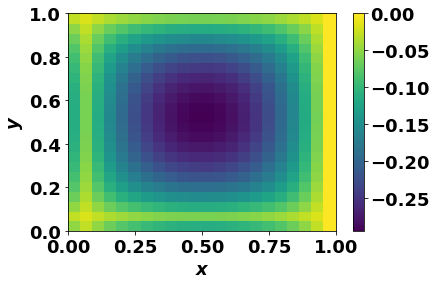

In [138]:
# Plot the solution
xx, yy = np.meshgrid(np.linspace(0, 1, N+3), np.linspace(0, 1, N+3))

# Have to reflect the w vector to match the data format that pcolor expects.
# For more information: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html
plt.pcolor(xx, yy, w)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar()

<ipython-input-163-0f4552e8279e>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(xx, yy, u)


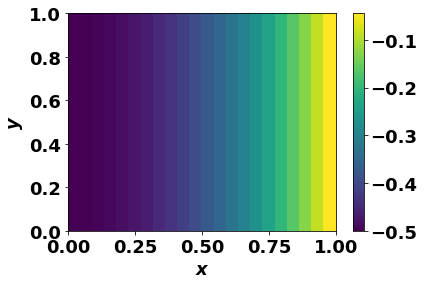

In [163]:
#Plot for u = (1/2)(x**2 - 1)
# Plot the solution
xx, yy = np.meshgrid(np.linspace(0, 1, N+3), np.linspace(0, 1, N+3))

# Create the analytical solution
u = srs(xx, yy, 20)

# Have to reflect the w vector to match the data format that pcolor expects.
# For more information: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html
xx, yy = np.meshgrid(np.linspace(0, 1, N+3), np.linspace(0, 1, N+3))

plt.pcolor(xx, yy, u)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar()

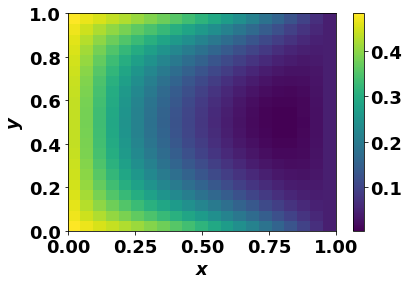

In [164]:
error = np.abs(u[1:N+2, 1:N+2] - w[1:N+2, 1:N+2])

# Plot the solution
xx, yy = np.meshgrid(np.linspace(0, 1, N+2), np.linspace(0, 1, N+2))

# Have to reflect the w vector to match the data format that pcolor expects.
# For more information: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html
plt.pcolor(xx, yy, error)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar()

In [170]:
N = 20    # The number of interval
h = 0.1  # Lenght of each interval

# Set tolerance
tolerance = h**2 / 4.

# This means we have N+1 points -> N-1 interior points
w = np.zeros((N+3, N+2))
errors = np.zeros((100*(N+1)*(N)))

for i in range(0, N+3):
    w[i, -1] = 0
# x = 1, y at all points, u = 0

# Create temporary buffer
wn = np.copy(w)

# Iterator
k = 0
m = 0

#while True:
for n in range(100):
    # Only iterate over the interior points.
    for i, j in itertools.product(range(1, N+2), range(1, N+1)):
        wn[i, j] = 0.25 * (wn[i-1, j] + w[i+1, j] + wn[i, j-1] + w[i, j+1] - (h**2)*1)
        errors[m] = np.abs(u[10, 12] - w[10,12])
        m += 1
    #No-flux boundary at x = 0
    for i in(range(0, N+3)):
        w[i, 0] = w[i, 2]
    #No-flux boundary at y = 0
    for j in(range(0, N+2)):
        w[-1, j] = w[-3, j]
    #No-flux boundary at y = 1
    for j in(range(0, N+2)):
        w[0, j] = w[2, j]
    
    #BCs for corner points
    # at i = 0, j = 1
    w[1, 0] = w[1, 2]
    # at i = 1, j = 0
    w[-1, 1] = w[-3, 1]
    # at i = 0, j = -2
    w[-2, 0] = w[-2, 2]
    # at i = 1, j = -1
    w[-1, 1] = w[-3, 1]
    
    # Compute the difference between the old and new approximation
    error = np.max(np.abs(wn - w))
        
    # Replace the former approximation
    w[1:N+3, 1:N+2] = wn[1:N+3, 1:N+2]
       
    # Increment iteration counter
    k += 1
    
    # Print progress.
    # print('k = {0:d}, error = {1:.4g}'.format(k, error))
    

print('Required {0:d} iterations!\nEror = {1:.4g}.'.format(k, error))


Required 100 iterations!
Eror = 0.1128.


Text(0, 0.5, '|u(0.5, 0.6) - w(0.5,0.6)|')

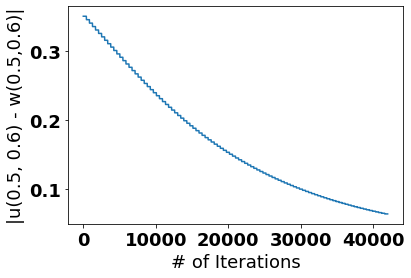

In [173]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 42000, 42000)
ax.plot(x, errors);
plt.xlabel('# of Iterations')
plt.ylabel('|u(0.5, 0.6) - w(0.5,0.6)|')

In [168]:
N = 20    # The number of interval
h = 0.1  # Lenght of each interval

# Set tolerance
tolerance = h**2 / 4.

# This means we have N+1 points -> N-1 interior points
w = np.zeros((N+3, N+2))
error = np.zeros((N+3, N+3))

for i in range(0, N+3):
    w[i, -1] = 0
# x = 1, y at all points, u = 0

# Create temporary buffer
wn = np.copy(w)

# Iterator
k = 0

#while True:
for n in range(100):
    # Only iterate over the interior points.
    for i, j in itertools.product(range(1, N+2), range(1, N+1)):
        # if 0.3 <= x <= 0.7
        if (i >= 6 & i <= 14):
            wn[i, j] = 0.25 * (wn[i-1, j] + w[i+1, j] + wn[i, j-1] + w[i, j+1] + (h**2)*0.5)
        else:
            wn[i, j] = 0.25 * (wn[i-1, j] + w[i+1, j] + wn[i, j-1] + w[i, j+1])

    #No-flux boundary at x = 0
    for i in(range(0, N+3)):
        w[i, 0] = w[i, 2]
    #No-flux boundary at y = 0
    for j in(range(0, N+2)):
        w[-1, j] = w[-3, j]
    #No-flux boundary at y = 1
    for j in(range(0, N+2)):
        w[0, j] = w[2, j]
    
    #BCs for corner points
    # at i = 0, j = 1
    w[1, 0] = w[1, 2]
    # at i = 1, j = 0
    w[-1, 1] = w[-3, 1]
    # at i = 0, j = -2
    w[-2, 0] = w[-2, 2]
    # at i = 1, j = -1
    w[-1, 1] = w[-3, 1]
    
    # Compute the difference between the old and new approximation
    error = np.max(np.abs(wn - w))
        
    # Replace the former approximation
    w[1:N+3, 1:N+2] = wn[1:N+3, 1:N+2]
       
    # Increment iteration counter
    k += 1
    
    # Print progress.
    # print('k = {0:d}, error = {1:.4g}'.format(k, error))
    
    if error < tolerance:
        break

print('Required {0:d} iterations!\nEror = {1:.4g}.'.format(k, error))

Required 1 iterations!
Eror = 0.0025.


<ipython-input-169-385d6538d0f7>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(xx, yy, w)


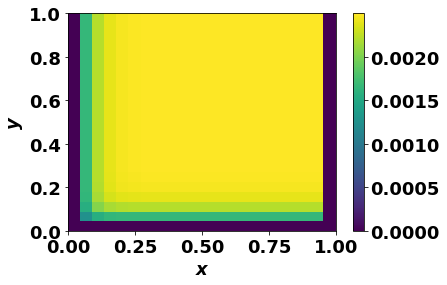

In [169]:
# Plot the solution
xx, yy = np.meshgrid(np.linspace(0, 1, N+3), np.linspace(0, 1, N+3))

# Have to reflect the w vector to match the data format that pcolor expects.
# For more information: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolor.html
plt.pcolor(xx, yy, w)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar()